<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/GL_ML_Pregnant_SMOTE_KNNIMPUTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [6]:
# Read the Training Data
train_data = pd.read_csv("/content/drive/MyDrive/GeekLurn_ML_Session/Proj2_Train.csv")

# Read the test Data
test_data = pd.read_csv("/content/drive/MyDrive/GeekLurn_ML_Session/Proj2_Test.csv")

train_data.shape,test_data.shape

((1000, 16), (100, 15))

In [7]:
df = pd.concat([train_data,test_data],axis = 0)

df.shape

(1100, 16)

In [8]:

#Removing Unnecessary Features
df.drop(['Sl No','Sample ID','Unnamed: 15','Consistency_Score'], axis = 1, inplace = True)

In [9]:
df.isnull().sum()

Age                     0
Ob_Score                0
BMI                     0
Position_Score          0
Effacement_Score        0
Dialation_Score         0
Station_Score           0
Total_Bishop_Score      0
Cerv_Len_cms          660
Cerv_Wid_cms          660
Induction               0
Del_mode                0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Ob_Score'] = le.fit_transform(df['Ob_Score'])

In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [12]:
df.isnull().sum()

Age                   0
Ob_Score              0
BMI                   0
Position_Score        0
Effacement_Score      0
Dialation_Score       0
Station_Score         0
Total_Bishop_Score    0
Cerv_Len_cms          0
Cerv_Wid_cms          0
Induction             0
Del_mode              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


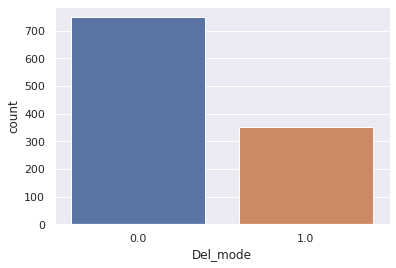

In [13]:
sns.countplot(df['Del_mode'])

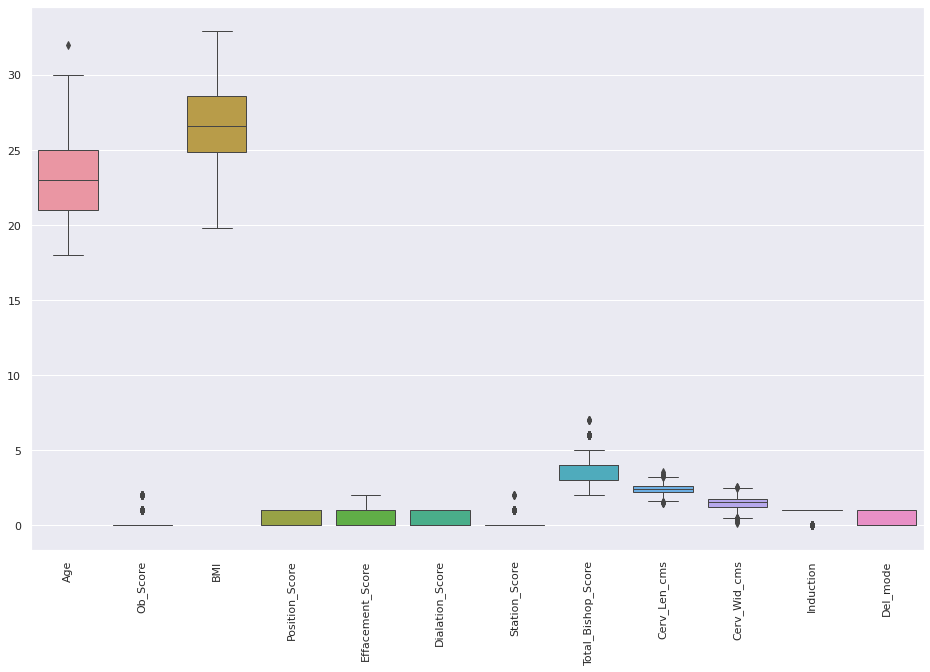

In [14]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
def outliers (df , ft) :
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound )| (df[ft] > upper_bound )]
    
    return ls

In [16]:
def remove (df, ls ):
    ls = sorted(set(ls))
    df = df.drop(ls)
    
    return df

In [17]:
index_list = []
for feature in [
 'Age',
 'Ob_Score',
 'BMI',
 'Position_Score',
 'Dialation_Score',
 'Station_Score',
 'Total_Bishop_Score',
 'Cerv_Len_cms',
 'Cerv_Wid_cms',
 'Induction',
 'Del_mode']:
    index_list.extend(outliers(df , feature))

In [18]:
df1 = remove(df,index_list)

In [20]:
df1.shape

(732, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


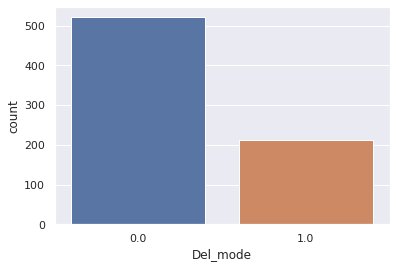

In [21]:
sns.countplot(df1['Del_mode'])

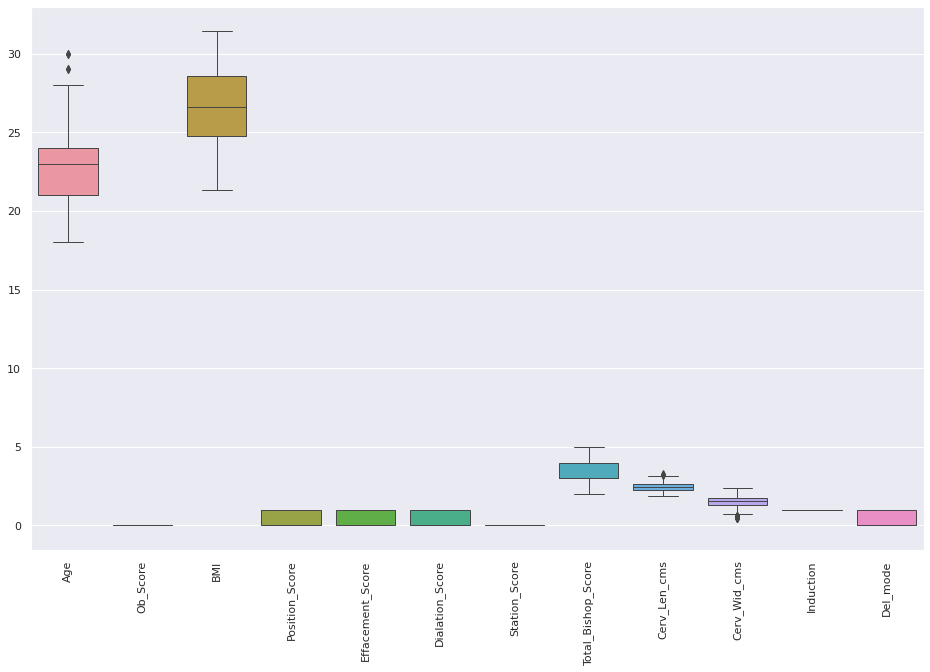

In [22]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df1, linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

In [23]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,732.0,22.965847,2.206862,18.000000,21.000000,23.000000,24.000000,30.000000
Ob_Score,732.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BMI,732.0,26.605294,2.350415,21.300000,24.769010,26.584167,28.602236,31.415765
Position_Score,732.0,0.517760,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Effacement_Score,732.0,0.383880,0.486662,0.000000,0.000000,0.000000,1.000000,1.000000
Dialation_Score,732.0,0.478142,0.499864,0.000000,0.000000,0.000000,1.000000,1.000000
Station_Score,732.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Total_Bishop_Score,732.0,3.438525,0.954673,2.000000,3.000000,3.000000,4.000000,5.000000
Cerv_Len_cms,732.0,2.466463,0.264258,1.870000,2.257082,2.462970,2.620523,3.239984
Cerv_Wid_cms,732.0,1.525365,0.352153,0.493955,1.285786,1.565271,1.717773,2.350850


In [24]:
df1['Del_mode'].value_counts()

0.0    521
1.0    211
Name: Del_mode, dtype: int64

In [25]:
#### Independent and Dependent Features
X=df1.drop("Del_mode",axis=1)
Y=df1['Del_mode']

In [26]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scale = sc.fit_transform(X)

In [27]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_scale,Y,test_size = 0.3, random_state=0,stratify=Y)

In [28]:
X_train.shape ,X_test.shape ,Y_train.shape,Y_test.shape

((512, 11), (220, 11), (512,), (220,))

In [30]:
"""**SMOTE Sampling**"""
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_SM, Y_train_SM = sm.fit_resample(X_train, Y_train)

print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_SM)))

The number of classes before fit Counter({0.0: 364, 1.0: 148})
The number of classes after fit Counter({1.0: 364, 0.0: 364})


In [31]:
"""**Logistic Regression with SMOTE Sampling**"""

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
logreg = LogisticRegression()
logreg.fit(X_train_SM,Y_train_SM)
y_pred_lr_SM = logreg.predict(X_test)

print(confusion_matrix(Y_test,y_pred_lr_SM))
print(accuracy_score(Y_test,y_pred_lr_SM))
print(classification_report(Y_test,y_pred_lr_SM))

[[126  31]
 [ 11  52]]
0.8090909090909091
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86       157
         1.0       0.63      0.83      0.71        63

    accuracy                           0.81       220
   macro avg       0.77      0.81      0.78       220
weighted avg       0.84      0.81      0.82       220



In [32]:
"""**KNN with SMOTE sampling**"""

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1, p=2) 
knn_clf.fit(X_train_SM,Y_train_SM)
Y_pred_knn_SM = knn_clf.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_knn_SM))
print(accuracy_score(Y_test,Y_pred_knn_SM))
print(classification_report(Y_test,Y_pred_knn_SM))


[[150   7]
 [  8  55]]
0.9318181818181818
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       157
         1.0       0.89      0.87      0.88        63

    accuracy                           0.93       220
   macro avg       0.92      0.91      0.92       220
weighted avg       0.93      0.93      0.93       220



In [33]:
kn_score1 = []
neighbors = range(1,20)

for i in neighbors:
        knn_clf = KNeighborsClassifier(n_neighbors=i, p=2)
        knn_clf.fit(X_train_SM,Y_train_SM)
        Y_pred_knn_SM = knn_clf.predict(X_test)
        kn_score1.append(accuracy_score(Y_test,Y_pred_knn_SM))

print(kn_score1)

[0.9318181818181818, 0.9136363636363637, 0.9, 0.8863636363636364, 0.8772727272727273, 0.8818181818181818, 0.8772727272727273, 0.8818181818181818, 0.8590909090909091, 0.8727272727272727, 0.8409090909090909, 0.8409090909090909, 0.8409090909090909, 0.85, 0.8090909090909091, 0.8090909090909091, 0.8, 0.8136363636363636, 0.7772727272727272]


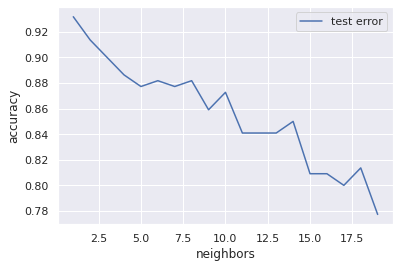

In [34]:
plt.plot(neighbors,kn_score1, label = "test error")
plt.ylabel("accuracy")
plt.xlabel("neighbors")
plt.legend()

In [35]:

"""**Support vector machine**"""

from sklearn.svm import SVC

svm = SVC(kernel = "linear", gamma = "auto")
svm.fit(X_train_SM,Y_train_SM)
Y_pred_svm_linear_SM = svm.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_svm_linear_SM))
print(accuracy_score(Y_test,Y_pred_svm_linear_SM))
print(classification_report(Y_test,Y_pred_svm_linear_SM))

svm = SVC(kernel = "rbf", gamma = "auto")
svm.fit(X_train_SM,Y_train_SM)
Y_pred_svm_rbf_SM = svm.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_svm_rbf_SM))
print(accuracy_score(Y_test,Y_pred_svm_rbf_SM))
print(classification_report(Y_test,Y_pred_svm_rbf_SM))

svm = SVC(kernel = "poly", gamma = "auto")
svm.fit(X_train_SM,Y_train_SM)
Y_pred_svm_poly_SM = svm.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_svm_poly_SM))
print(accuracy_score(Y_test,Y_pred_svm_poly_SM))
print(classification_report(Y_test,Y_pred_svm_poly_SM))


[[118  39]
 [ 11  52]]
0.7727272727272727
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.83       157
         1.0       0.57      0.83      0.68        63

    accuracy                           0.77       220
   macro avg       0.74      0.79      0.75       220
weighted avg       0.82      0.77      0.78       220

[[137  20]
 [  9  54]]
0.8681818181818182
              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90       157
         1.0       0.73      0.86      0.79        63

    accuracy                           0.87       220
   macro avg       0.83      0.86      0.85       220
weighted avg       0.88      0.87      0.87       220

[[129  28]
 [ 17  46]]
0.7954545454545454
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       157
         1.0       0.62      0.73      0.67        63

    accuracy                           0.80       220
  

In [40]:
###"""** Stocastic Gradient Classifier """**

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(eta0 = 0.1011, max_iter = 50)
sgd.fit(X_train_SM,Y_train_SM)
Y_pred_sgd_SM = sgd.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_sgd_SM))
print(accuracy_score(Y_test,Y_pred_sgd_SM))
print(classification_report(Y_test,Y_pred_sgd_SM))

[[95 62]
 [17 46]]
0.6409090909090909
              precision    recall  f1-score   support

         0.0       0.85      0.61      0.71       157
         1.0       0.43      0.73      0.54        63

    accuracy                           0.64       220
   macro avg       0.64      0.67      0.62       220
weighted avg       0.73      0.64      0.66       220



In [41]:
sgd_score = []
setting = np.arange(0.101,0.102,0.0001)

for i in setting:
    sgd = SGDClassifier(eta0 = i, max_iter = 50)
    sgd.fit(X_train_SM,Y_train_SM)
    Y_pred_sgd_SM = sgd.predict(X_test)
    sgd_score.append(accuracy_score(Y_test,Y_pred_sgd_SM))
    
print(sgd_score)

[0.6818181818181818, 0.7181818181818181, 0.7545454545454545, 0.7954545454545454, 0.6681818181818182, 0.759090909090909, 0.6772727272727272, 0.6727272727272727, 0.5590909090909091, 0.7454545454545455]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

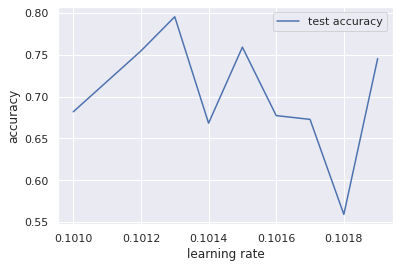

In [42]:
plt.plot(setting,sgd_score, label = "test accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

In [43]:
"""**Decision Tree classifier**"""

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 8)
dt.fit(X_train_SM,Y_train_SM)
Y_pred_dt_SM = dt.predict(X_test)

dt.tree_.node_count, dt.tree_.max_depth

print(confusion_matrix(Y_test,Y_pred_dt_SM))
print(accuracy_score(Y_test,Y_pred_dt_SM))
print(classification_report(Y_test,Y_pred_dt_SM))

[[128  29]
 [  7  56]]
0.8363636363636363
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       157
         1.0       0.66      0.89      0.76        63

    accuracy                           0.84       220
   macro avg       0.80      0.85      0.82       220
weighted avg       0.87      0.84      0.84       220



In [44]:
dt_score = []
md = range(1,14)
for i in md:
    dt = DecisionTreeClassifier(criterion = "gini", max_depth = i)
    dt.fit(X_train_SM,Y_train_SM)
    Y_pred_dt_SM = dt.predict(X_test)
    dt_score.append(accuracy_score(Y_test,Y_pred_dt_SM))

print(dt_score)

[0.7, 0.7454545454545455, 0.7045454545454546, 0.759090909090909, 0.8227272727272728, 0.8545454545454545, 0.85, 0.8409090909090909, 0.8636363636363636, 0.8636363636363636, 0.8909090909090909, 0.8818181818181818, 0.8772727272727273]


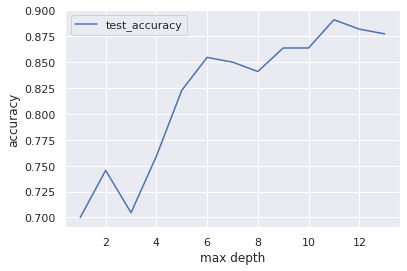

In [45]:
plt.plot(md,dt_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("max depth")
plt.legend()

In [46]:
"""**BaggingClassifier**"""

from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator = dt, max_samples = 0.6)
bag.fit(X_train_SM,Y_train_SM)
Y_pred_bag_SM = bag.predict(X_test)


print(confusion_matrix(Y_test,Y_pred_bag_SM))
print(accuracy_score(Y_test,Y_pred_bag_SM))
print(classification_report(Y_test,Y_pred_bag_SM))

[[147  10]
 [  9  54]]
0.9136363636363637
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       157
         1.0       0.84      0.86      0.85        63

    accuracy                           0.91       220
   macro avg       0.89      0.90      0.89       220
weighted avg       0.91      0.91      0.91       220



In [47]:
bag_score = []
ms = np.arange(0.1,1,0.1)
for i in ms:
    bag = BaggingClassifier(base_estimator = dt, max_samples = i)
    bag.fit(X_train_SM,Y_train_SM)
    Y_pred_bag_SM = bag.predict(X_test)
    bag_score.append(accuracy_score(Y_test,Y_pred_bag_SM))
    
print(bag_score)

[0.85, 0.9090909090909091, 0.8909090909090909, 0.9136363636363637, 0.9090909090909091, 0.9136363636363637, 0.9090909090909091, 0.9181818181818182, 0.9181818181818182]


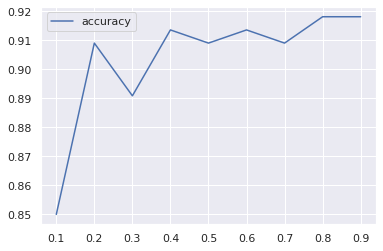

In [48]:
plt.plot(ms,bag_score,label = "accuracy")
plt.legend()

In [49]:
###Random Forest Classifier**

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_features = 0.3, n_estimators = 33)
RF.fit(X_train_SM,Y_train_SM)
Y_pred_rf_SM = RF.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_rf_SM))
print(accuracy_score(Y_test,Y_pred_rf_SM))
print(classification_report(Y_test,Y_pred_rf_SM))

[[149   8]
 [  9  54]]
0.9227272727272727
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       157
         1.0       0.87      0.86      0.86        63

    accuracy                           0.92       220
   macro avg       0.91      0.90      0.91       220
weighted avg       0.92      0.92      0.92       220



In [50]:
rf_score = []
mf = np.arange(0.1,1,0.1)
for i in mf:
    RF = RandomForestClassifier(max_features = i, n_estimators = 33)
    RF.fit(X_train_SM,Y_train_SM)
    Y_pred_rf_SM = RF.predict(X_test)
    rf_score.append(accuracy_score(Y_test,Y_pred_rf_SM))
    
print(rf_score)

[0.9272727272727272, 0.9227272727272727, 0.9272727272727272, 0.9318181818181818, 0.9181818181818182, 0.9136363636363637, 0.9227272727272727, 0.9181818181818182, 0.9227272727272727]


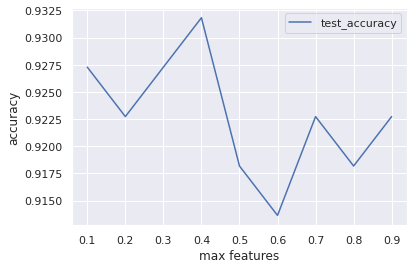

In [51]:
plt.plot(mf,rf_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("max features")
plt.legend()

In [52]:
rf_score1 = []
est = range(30,40,1)
for i in est:
    
    RF = RandomForestClassifier(max_features = 0.1, n_estimators = i)
    RF.fit(X_train_SM,Y_train_SM)
    Y_pred_rf_SM = RF.predict(X_test)
    rf_score1.append(accuracy_score(Y_test,Y_pred_rf_SM))
    
print(rf_score1)

[0.9272727272727272, 0.9318181818181818, 0.9272727272727272, 0.9318181818181818, 0.9363636363636364, 0.9272727272727272, 0.9272727272727272, 0.9318181818181818, 0.9363636363636364, 0.9363636363636364]


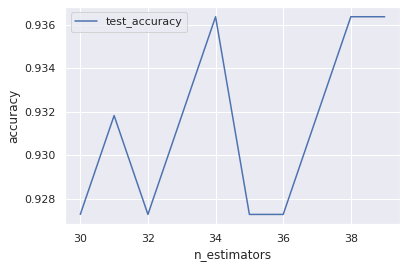

In [53]:
plt.plot(est,rf_score1,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()


In [54]:
"""**Ada Boost Classifier**"""

from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(base_estimator = dt, n_estimators = 30)
adb.fit(X_train_SM,Y_train_SM)
Y_pred_adb_SM = adb.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_adb_SM))
print(accuracy_score(Y_test,Y_pred_adb_SM))
print(classification_report(Y_test,Y_pred_adb_SM))


[[141  16]
 [ 10  53]]
0.8818181818181818
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       157
         1.0       0.77      0.84      0.80        63

    accuracy                           0.88       220
   macro avg       0.85      0.87      0.86       220
weighted avg       0.89      0.88      0.88       220



In [55]:
adb_score = []
est = range(1,100,10)
for i in est:
    adb = AdaBoostClassifier(base_estimator = dt, n_estimators = i)
    adb.fit(X_train_SM,Y_train_SM)
    Y_pred_adb_SM = adb.predict(X_test)
    adb_score.append(accuracy_score(Y_test,Y_pred_adb_SM))

print(adb_score)


[0.8818181818181818, 0.8772727272727273, 0.8681818181818182, 0.8863636363636364, 0.8818181818181818, 0.8863636363636364, 0.8818181818181818, 0.8681818181818182, 0.8863636363636364, 0.8818181818181818]


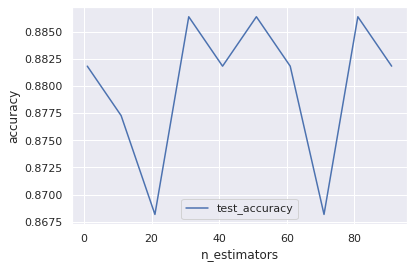

In [56]:
plt.plot(est,adb_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()


In [57]:
##**Gradinet Boosting**

from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.165)
gbr.fit(X_train_SM,Y_train_SM)
Y_pred_gbr_SM = gbr.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_gbr_SM))
print(accuracy_score(Y_test,Y_pred_gbr_SM))
print(classification_report(Y_test,Y_pred_gbr_SM))

[[147  10]
 [  8  55]]
0.9181818181818182
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       157
         1.0       0.85      0.87      0.86        63

    accuracy                           0.92       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.92      0.92      0.92       220



In [58]:
gbr_score = []
setting = np.arange(0.01,0.2,0.01)
for i in setting:
    gbr = GradientBoostingClassifier(n_estimators = 100, learning_rate = i)
    gbr.fit(X_train_SM,Y_train_SM)
    Y_pred_gbr_SM = gbr.predict(X_test)
    gbr_score.append(accuracy_score(Y_test,Y_pred_gbr_SM))

print(gbr_score)

[0.8409090909090909, 0.8590909090909091, 0.8727272727272727, 0.8727272727272727, 0.8772727272727273, 0.8954545454545455, 0.8818181818181818, 0.8909090909090909, 0.9090909090909091, 0.9090909090909091, 0.8863636363636364, 0.9136363636363637, 0.9, 0.9181818181818182, 0.9090909090909091, 0.9136363636363637, 0.9, 0.9, 0.9181818181818182]


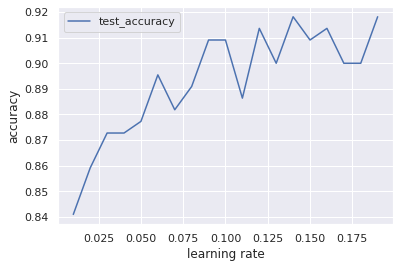

In [59]:
plt.plot(setting,gbr_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

In [60]:
##**XG Boost**


from xgboost import XGBClassifier
XG = XGBClassifier(learning_rate = 0.14, gamma = 0, reg_lambda = 1, n_estimators = 100)
XG.fit(X_train_SM,Y_train_SM)
Y_pred_XG_SM = XG.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_XG_SM))
print(accuracy_score(Y_test,Y_pred_XG_SM))
print(classification_report(Y_test,Y_pred_XG_SM))


[[142  15]
 [  9  54]]
0.8909090909090909
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       157
         1.0       0.78      0.86      0.82        63

    accuracy                           0.89       220
   macro avg       0.86      0.88      0.87       220
weighted avg       0.90      0.89      0.89       220



In [61]:
XG_score = []
est = range(1,100,10)
for i in est:
    XG = XGBClassifier(learning_rate = 0.14, gamma = 0, reg_lambda = 1, n_estimators = i)
    XG.fit(X_train_SM,Y_train_SM)
    Y_pred_XG_SM = XG.predict(X_test)
    XG_score.append(accuracy_score(Y_test,Y_pred_XG_SM))

print(XG_score)

[0.6909090909090909, 0.85, 0.8636363636363636, 0.8772727272727273, 0.8772727272727273, 0.8863636363636364, 0.8909090909090909, 0.8863636363636364, 0.9, 0.8909090909090909]


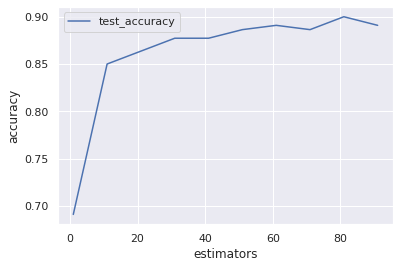

In [62]:
plt.plot(est,XG_score,label = "test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("estimators")
plt.legend()

In [63]:
print('Acc_XG_SM:', accuracy_score(Y_test,Y_pred_XG_SM))
print('Acc_GRB_SM:', accuracy_score(Y_test,Y_pred_gbr_SM))
print('Acc_ADB_SM:', accuracy_score(Y_test,Y_pred_adb_SM))
print('Acc_RF_SM:', accuracy_score(Y_test,Y_pred_rf_SM))
print('Acc_BAG_SM:', accuracy_score(Y_test,Y_pred_bag_SM))
print('Acc_DT_SM:', accuracy_score(Y_test,Y_pred_dt_SM))
print('Acc_SGD_SM:', accuracy_score(Y_test,Y_pred_sgd_SM))
print('Acc_SVM_POLY_SM:', accuracy_score(Y_test,Y_pred_svm_poly_SM))
print('Acc_SVM_RBF_SM:', accuracy_score(Y_test,Y_pred_svm_rbf_SM))
print('Acc_SVM_LINEAR_SM:', accuracy_score(Y_test,Y_pred_svm_linear_SM))
print('Acc_KNN_SM:', accuracy_score(Y_test,Y_pred_knn_SM))
print('Acc_LR_SM:', accuracy_score(Y_test,y_pred_lr_SM))

Acc_XG_SM: 0.8909090909090909
Acc_GRB_SM: 0.9181818181818182
Acc_ADB_SM: 0.8818181818181818
Acc_RF_SM: 0.9363636363636364
Acc_BAG_SM: 0.9181818181818182
Acc_DT_SM: 0.8772727272727273
Acc_SGD_SM: 0.7454545454545455
Acc_SVM_POLY_SM: 0.7954545454545454
Acc_SVM_RBF_SM: 0.8681818181818182
Acc_SVM_LINEAR_SM: 0.7727272727272727
Acc_KNN_SM: 0.7772727272727272
Acc_LR_SM: 0.8090909090909091
